# Playing around with the Requests library

In [35]:
import requests
from bs4 import BeautifulSoup as bs4
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/jayfeng1/Craigslist-Pricing-Project/master/craigSeattle.csv')

In [25]:
df.columns

Index(['price', 'link', 'longitude', 'baths', 'date', 'contentLen', 'size',
       'postDate', 'CraigID', 'area', 'title', 'coord', 'beds', 'updateDate',
       'latitude', 'numPic', 'zipcode'],
      dtype='object')

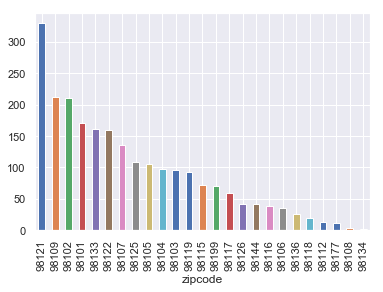

In [33]:
df.groupby('zipcode').price.count().sort_values(ascending=False).plot(kind='bar')